# SPROCKET CENTRAL PVT LTD.

# TABLE OF CONTENTS

1. **[Getting Data](#load)**
2. **[Data Quality Assessment](#assess)**   <br>
    2a. **[SHEET1](#sh1)**                  <br>
    2b. **[SHEET2](#sh2)**                  <br>
    2c. **[SHEET3](#sh3)**                  <br>
    2d. **[SHEET4](#sh4)**                  <br>
3. **[Exploratory Data Analysis](#eda)**
4. **[RFM Analysis](#rfm)**
5. **[Data Visualization](#viz)**

<a id='load'></a>
## Getting Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#getting list of sheet names
df_dict = pd.read_excel(r"C:\Users\91978\OneDrive\Desktop\KPMG Consulting Virtual Internship\Task-2\Sprocket Central Pty Ltd.xlsx", sheet_name=None, header = 0)
df_dict.keys()

dict_keys(['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])

In [4]:
# creating separate dataframes for each sheet for easier analysis
transactions = df_dict.get('Transactions')
newcust = df_dict.get('NewCustomerList')
custdemo = df_dict.get('CustomerDemographic')
address = df_dict.get('CustomerAddress')

<a id='assess'></a>
# Data Quality Assessment

<a id='sh1'></a>
### SHEET1 - Transactions

In [5]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
transactions.shape

(20000, 13)

In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

**Observation**
- **NULL VALUES**: We can see there are some null values in columns `online_order`, `brand`, `product_line`, `product_class`, `product_size`, `standard_cost`, `product_first_sold_date`. 

- **CONSISTENCY**:  
`product_first_sold_date` looks like it is a number of days since a certain time. We need to change the datatype from float64 to date format.

- **DATA TYPE**
`online_order` is actually a categorical column. So we change it from float64 to category and also change the values to more meaningful labels where '0' and '1' represent respective their categories.  <br>
`order_status`, `brand`, `product_line`, `product_class` and `product_size` are objects, we can change them into categories.
Coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis.

#### DISTINCT CUSTOMER IDs

In [8]:
transactions.customer_id.nunique()

3494

There are transaction records for 3494 customers only.

#### MISSING VALUES

In [9]:
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
#percentage missing values in each column
transactions.isnull().sum()/len(transactions) *100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

**Observation** - We can see there are less than 2% missing values in any any column, if any. We will remove them from the training dataset since it is not a key column and we have sufficient data to make analysis.

#### Duplicates?

In [11]:
# to find duplicates
transactions.duplicated().sum()

0

**Observation** - Data does not have any duplicates!

### Checking for consistency and validity

In [12]:
transactions['online_order'].unique()

array([ 0.,  1., nan])

In [13]:
transactions['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [14]:
transactions['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [15]:
transactions['product_class'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [16]:
transactions['product_size'].unique()

array(['medium', 'large', 'small', nan], dtype=object)

**Observation** - Our data is consistent and does not have any invalid values besides null records. 

## DATA CLEANING

#### DATA TYPE

In [17]:
# Convert float64 column to datetime with date format
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'].apply(lambda x: pd.Timestamp(x, unit='D').date()))

In [18]:
# coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis

transactions['order_status'] = transactions['order_status'].astype("category")
transactions['brand'] = transactions['brand'].astype("category")
transactions['product_line'] = transactions['product_line'].astype("category")
transactions['product_class'] = transactions['product_class'].astype("category")
transactions['product_size'] = transactions['product_size'].astype("category")

In [19]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2082-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2084-03-04
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,2069-07-21
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,2068-12-17
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2085-08-11


In [20]:
transactions['product_first_sold_date'].dtype

dtype('<M8[ns]')

### MISSING VALUES

In [21]:
transactions.dropna(inplace=True)

In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  category      
 6   brand                    19445 non-null  category      
 7   product_line             19445 non-null  category      
 8   product_class            19445 non-null  category      
 9   product_size             19445 non-null  category      
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [23]:
#percentage missing values in each column
transactions.isnull().sum()/len(transactions) *100

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

**We now have no missing values!**

###  data types

In [24]:
transactions['online_order'].replace( {0.0:'False', 1.0:'True'}, inplace=True)

In [25]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2082-12-04
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2084-03-04
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,2069-07-21
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,2068-12-17
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2085-08-11


## We do the same process for the other datasets provided

In [26]:
transactions.describe(include=['category'])

,order_status,brand,product_line,product_class,product_size
count,19445,19445,19445,19445,19445
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19273,4169,13920,13587,12767


<a id='sh2'></a>
### SHEET2 - CUSTOMER DEMOGRAPHIC

In [27]:
custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [28]:
custdemo.shape

(4000, 13)

In [29]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

**Observation**
- **NULL VALUES**: We can see there are some null values in columns `last_name`, `DOB`, `job_title`, `job_industry_category`, `default`, `tenure`.

- **RELEVANCE**:  
`default` column seems to contain some metadata which is unnecessary for us.

- **DATA TYPE**:
`first_name`, `last_name`, `gender`, `job_title`, `job_industry_category`, `wealth_Segment`, `deceased_indiactor`, and `owns_car` are objects, we can change them into categories.
Coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis.

### DISTINCT CUSTOMER IDs

In [30]:
custdemo.customer_id.nunique()

4000

There are total 4000 unique customers the organisation has.

### Checking for consistency and validity

In [31]:
custdemo.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [32]:
custdemo['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [33]:
custdemo['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [34]:
custdemo['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [35]:
custdemo['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
custdemo['tenure'].unique()

array([11., 16., 15.,  7.,  8., 13., 20.,  9.,  6.,  1., 18., 21., 12.,
       19., 14.,  4., 22.,  5., 17.,  2.,  3., 10., nan])

**Observation**
- **CONSISTENCY**: There is inconsistent data in `gender`.

- **RELEVANCE**:We can also remove values corresponding to `deceased indiactor` = `Y`, since we would be analysing the data only for customers who are alive.

### Checking for duplicate rows

In [37]:
# to find duplicates
custdemo.duplicated().sum()

0

**Observation** - Data does not have any duplicate rows!

### DATA CLEANING

- drop unnecessary column `default`
- values corrsponding to `Y` in deceased indicator
- changing data types
- column `gender`
- null values

In [38]:
# drop 'default'
custdemo = custdemo.drop('default', axis=1)

In [39]:
#custdemo = custdemo['deceased_indicator'].drop()
custdemo = custdemo.drop(custdemo.index[custdemo['deceased_indicator'] == 'Y'])

In [40]:
custdemo['deceased_indicator'].unique()

array(['N'], dtype=object)

**Data Type**

In [41]:
# coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis

custdemo['first_name'] = custdemo['first_name'].astype("category")
custdemo['last_name'] = custdemo['last_name'].astype("category")
custdemo['gender'] = custdemo['gender'].astype("category")
custdemo['job_title'] = custdemo['job_title'].astype("category")
custdemo['job_industry_category'] = custdemo['job_industry_category'].astype("category")
custdemo['wealth_segment'] = custdemo['wealth_segment'].astype("category")
custdemo['deceased_indicator'] = custdemo['deceased_indicator'].astype("category")
custdemo['owns_car'] = custdemo['owns_car'].astype("category")

#### Inconsistent data

In [42]:
custdemo.gender.unique()

['F', 'Male', 'Female', 'U', 'Femal', 'M']
Categories (6, object): ['F', 'Femal', 'Female', 'M', 'Male', 'U']

In [43]:
custdemo.replace({'F':'Female', 'M':'Male', 'Femal':'Female'}, inplace=True)

In [44]:
custdemo.gender.unique()

['Female', 'Male', 'U']
Categories (3, object): ['Female', 'Male', 'U']

#### Missing Values

In [45]:
custdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [46]:
#percentage missing values in each column
custdemo.isnull().sum()/len(transactions) *100

customer_id                            0.000000
first_name                             0.000000
last_name                              0.642839
gender                                 0.000000
past_3_years_bike_related_purchases    0.000000
DOB                                    0.447416
job_title                              2.602211
job_industry_category                  3.373618
wealth_segment                         0.000000
deceased_indicator                     0.000000
owns_car                               0.000000
tenure                                 0.447416
dtype: float64

**Observation** - For 'job_title' and 'job_industry_segment' we can impute the values using `mode`. `last_name` and `tenure`do not look like a key columns for our analysis, so we can leave it like that for now.

In [47]:
# using mode

custdemo['job_title'].fillna(custdemo['job_title'].mode()[0], inplace = True)
custdemo['job_industry_category'].fillna(custdemo['job_industry_category'].mode()[0], inplace = True)

In [48]:
custdemo.isnull().sum()/ len(custdemo) * 100

customer_id                            0.000000
first_name                             0.000000
last_name                              3.126563
gender                                 0.000000
past_3_years_bike_related_purchases    0.000000
DOB                                    2.176088
job_title                              0.000000
job_industry_category                  0.000000
wealth_segment                         0.000000
deceased_indicator                     0.000000
owns_car                               0.000000
tenure                                 2.176088
dtype: float64

<a id='sh3'></a>
### SHEET3 - CUSTOMER ADDRESS

In [49]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [50]:
address.shape

(3999, 6)

In [51]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


### DISTINCT CUSTOMER IDs

In [52]:
address.customer_id.nunique()

3999

### Checking for consistency and validity

In [53]:
address.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [54]:
address.country.unique()

array(['Australia'], dtype=object)

#### Checking for duplicates

In [55]:
address.duplicated().sum()

0

**Observation**
- **CONSISTENCY**: There is inconsistent data in `state` column.

In [56]:
address.state.replace({'NSW':'New South Wales', 'VIC':'Victoria'},inplace=True)

In [57]:
address.state.unique()

array(['New South Wales', 'QLD', 'Victoria'], dtype=object)

**Changing data type from object to category**

In [58]:
address['address'] = address['address'].astype('category')
address['state'] = address['state'].astype('category')
address['country'] = address['country'].astype('category')

In [59]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         3999 non-null   int64   
 1   address             3999 non-null   category
 2   postcode            3999 non-null   int64   
 3   state               3999 non-null   category
 4   country             3999 non-null   category
 5   property_valuation  3999 non-null   int64   
dtypes: category(3), int64(3)
memory usage: 270.0 KB


<a id='sh4'></a>
### SHEET4 - NewCustomersList

In [60]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.852055
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.150685
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.712329
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.290411
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.652055


In [61]:
newcust.shape

(1000, 19)

In [62]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

### MISSING VALUES

In [63]:
#missing values in each col
newcust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
Age                                      0
dtype: int64

#### Duplicates?

In [64]:
# to find duplicates
newcust.duplicated().sum()

0

**Observation** - Data does not have any duplicates!

### Checking for consistency and validity

In [65]:
newcust['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [66]:
newcust['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [67]:
newcust['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [68]:
newcust['deceased_indicator'].unique()

array(['N'], dtype=object)

In [69]:
newcust['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [70]:
newcust['tenure'].unique()

array([14, 16, 10,  5, 19, 22,  8, 17,  3,  9,  4, 11, 12, 13,  7, 20, 15,
        6, 18, 21,  2,  1,  0], dtype=int64)

In [71]:
newcust['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [72]:
newcust['country'].unique()

array(['Australia'], dtype=object)

In [73]:
newcust['property_valuation'].unique()

array([ 6, 11,  5,  1,  9,  7, 10,  8,  4,  2, 12,  3], dtype=int64)

**Observation** - Our data is consistent and does not have any invalid values besides null values. 

**Changing data type from object to category**

In [74]:
newcust['first_name'] = newcust['first_name'].astype("category")
newcust['last_name'] = newcust['last_name'].astype("category")
newcust['gender'] = newcust['gender'].astype("category")
newcust['job_title'] = newcust['job_title'].astype("category")
newcust['job_industry_category'] = newcust['job_industry_category'].astype("category")
newcust['wealth_segment'] = newcust['wealth_segment'].astype("category")
newcust['deceased_indicator'] = newcust['deceased_indicator'].astype("category")
newcust['owns_car'] = newcust['owns_car'].astype("category")
newcust['address'] = newcust['address'].astype('category')
newcust['state'] = newcust['state'].astype('category')
newcust['country'] = newcust['country'].astype('category')

In [75]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   category      
 1   last_name                            971 non-null    category      
 2   gender                               1000 non-null   category      
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    category      
 6   job_industry_category                835 non-null    category      
 7   wealth_segment                       1000 non-null   category      
 8   deceased_indicator                   1000 non-null   category      
 9   owns_car                             1000 non-null   category      
 10  tenure       

****

<a id='eda'></a>
# EXPLORATORY DATA ANALYSIS

#### Feature Engineering

In [76]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2082-12-04
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2084-03-04
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,2069-07-21
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,2068-12-17
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2085-08-11


#### created new column 'profit'

In [77]:
transactions['Profit'] = transactions['list_price'] - transactions['standard_cost']

In [78]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2082-12-04,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2084-03-04,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,2069-07-21,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,2068-12-17,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2085-08-11,1055.82


#### calculating 'age' from DOB

In [79]:
custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0


In [80]:
custdemo.DOB.dtype

dtype('<M8[ns]')

In [81]:
from datetime import date

# Convert the DOB column to datetime format
#custdemo['DOB'] = pd.to_datetime(custdemo['DOB'])

# Calculate the age using today's date and the DOB
today = pd.Timestamp(date.today())
age = (today - custdemo['DOB']) / pd.Timedelta(days=365)

custdemo['Age'] = age.round().astype('Int64')

# Print the resulting DataFrame
custdemo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,NaN,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,48
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,22
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,<NA>
3998,3999,Patrizius,NaN,Male,11,1973-10-24,Business Systems Development Analyst,Manufacturing,Affluent Customer,N,Yes,10.0,50


In [82]:
custdemo.Age.describe()

count    3911.000000
mean       45.830222
std        12.801247
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max       179.000000
Name: Age, dtype: float64

In [83]:
filtered = custdemo[custdemo['Age'] > 100]
filtered

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,179


**Observation**- We see here that the maximum age is 179 which we know cannot be possible. So, we change the DOB for this customer from `1843-12-21` to `1943-12-21` and also calculate the age again.

In [84]:
# Change the DOB for the first customer in the filtered dataframe
custdemo.at[custdemo.index[33], 'DOB'] = pd.to_datetime('1943-12-21')

In [85]:
age = (today - custdemo['DOB']) / pd.Timedelta(days=365)

custdemo['Age'] = age.round().astype('Int64')

In [86]:
custdemo.Age.describe()

count    3911.000000
mean       45.804654
std        12.633965
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        92.000000
Name: Age, dtype: float64

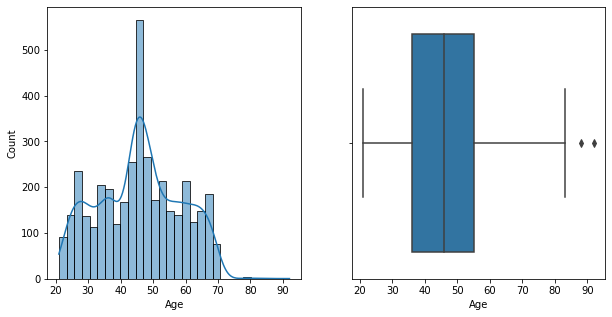

In [87]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(custdemo.Age, kde=True, ax=axs[0])
sns.boxplot(x='Age',data=custdemo, ax=axs[1])
plt.show()

#### Since is a key variable for our analysis, we will try to deal with the missing values and impute it.
**We can see that the variable Age is almost normally distributed. So we can use either of the central tendency values(mean/median) to deal with missing values.**   <br>
Here we will use `median` to impute the values.

In [88]:
custdemo.Age = custdemo.Age.fillna(custdemo.Age.median())
custdemo[custdemo.Age.isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age


We can also drop the DOB column now is it is not needed.

In [89]:
custdemo.drop('DOB',axis=1, inplace=True)

In [90]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3998 non-null   int64   
 1   first_name                           3998 non-null   category
 2   last_name                            3873 non-null   category
 3   gender                               3998 non-null   category
 4   past_3_years_bike_related_purchases  3998 non-null   int64   
 5   job_title                            3998 non-null   category
 6   job_industry_category                3998 non-null   category
 7   wealth_segment                       3998 non-null   category
 8   deceased_indicator                   3998 non-null   category
 9   owns_car                             3998 non-null   category
 10  tenure                               3911 non-null   float64 
 11  Age              

<a id='rfm'></a>
## RFM Analysis 
It is a customer segmentation technique that is commonly used in marketing to identify and target specific groups of customers. RFM stands for Recency, Frequency, and Monetary value.

Using RFM analysis, customers can be segmented into groups based on their recency, frequency, and monetary value scores. For example, customers who have made a purchase recently, make frequent purchases, and have spent a lot of money would be considered the most valuable customers and would be targeted with special promotions and offers.

### Merge all the 3 tables

i.e. Transactions, CustomerDemographic and CustomerAddress

In [91]:
new_table = address.merge(pd.merge(left=transactions, right=custdemo, how='inner', on='customer_id'), on='customer_id',suffixes= ('_x', '_y'))

In [92]:
new_table.head()

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,False,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,3765,38,2017-04-06,True,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,5157,47,2017-05-11,True,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,9785,72,2017-01-05,False,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,13424,2,2017-02-21,False,...,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70


In [93]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19408 entries, 0 to 19407
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19408 non-null  int64         
 1   address                              19408 non-null  category      
 2   postcode                             19408 non-null  int64         
 3   state                                19408 non-null  category      
 4   country                              19408 non-null  category      
 5   property_valuation                   19408 non-null  int64         
 6   transaction_id                       19408 non-null  int64         
 7   product_id                           19408 non-null  int64         
 8   transaction_date                     19408 non-null  datetime64[ns]
 9   online_order                         19408 non-null  object        
 10  order_stat

In [94]:
new_table.customer_id.nunique()

3486

#### **`Recency`** refers to how recently a customer has made a purchase. Customers who have made a purchase more recently are considered to be more valuable than those who have not made a purchase in a while.

In [95]:
sorted_table = new_table.sort_values(by='transaction_date')
comparison_date = sorted_table['transaction_date'].iloc[0]
comparison_date

Timestamp('2017-01-01 00:00:00')

In [96]:
# check recency

new_table['recency'] = new_table['transaction_date'] - comparison_date

In [97]:
new_table.head(1)

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,recency
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,False,...,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70,356 days


In [98]:
rec_values = new_table.recency.astype(str).str.split(' ')
new_table['recency'] = rec_values.str[0]
new_table['recency'] = new_table['recency'].astype('int64')

In [99]:
new_table.head(1)

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,recency
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,False,...,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70,356


#### `Frequency` refers to how often a customer makes purchases. Customers who make more frequent purchases are considered to be more valuable than those who make purchases less frequently.

#### `Monetary value` refers to the amount of money a customer has spent on purchases. Customers who have spent more money are considered to be more valuable than those who have spent less money.

In [100]:
pivot_table = pd.pivot_table(new_table, index='customer_id',values=['product_id','recency','Profit'],
               aggfunc={'product_id': 'count','recency': 'min','Profit': 'sum'})

pivot_table = pivot_table.rename(columns={'product_id': 'frequency',
                                          'Profit': 'monetary value'})

pivot_table

,monetary value,frequency,recency
customer_id,,,
1,3018.09,11,4
2,2226.26,3,123
4,220.57,2,92
5,2394.94,6,61
6,3946.55,5,27
...,...,...,...
3496,2045.84,4,65
3497,1648.32,3,243
3498,3147.33,6,33


In [101]:
pivot_table.describe()

,monetary value,frequency,recency
count,3486.000000,3486.000000,3486.000000
mean,3070.750201,5.567413,63.109868
std,1747.707801,2.292002,61.119426
min,15.080000,1.000000,0.000000
25%,1796.890000,4.000000,18.000000
50%,2795.780000,5.000000,44.000000
75%,4120.250000,7.000000,90.000000
max,11668.950000,14.000000,356.000000


In [102]:
# calculating M Score, where a greater value indicates customers who have spent more money. Hence are considered to be more 
# valuable than those who have spent less money

for index,row in pivot_table.iterrows():
    if row['monetary value'] > 4120.25:
        pivot_table.loc[index,'M_score'] = 4
    elif row['monetary value'] > 2795.78:
        pivot_table.loc[index, 'M_score'] = 3
    elif row['monetary value'] > 1796.89:
        pivot_table.loc[index, 'M_score'] = 2
    elif row['monetary value'] > 15.08: 
        pivot_table.loc[index, 'M_score'] = 1
    else:
        pivot_table.loc[index, 'M_score'] = 0

In [103]:
# calculating F Score, where a greater value indicates customers who have purchased products most frequently.

for index, row in pivot_table.iterrows():
    if row['frequency']  > 7:
        pivot_table.loc[index,'F_score'] = 4
    elif row['frequency']  > 5:
        pivot_table.loc[index,'F_score'] = 3
    elif row['frequency'] > 4:
        pivot_table.loc[index, 'F_score'] = 2
    elif row['frequency'] > 1: 
        pivot_table.loc[index,'F_score'] = 1
    else:
        pivot_table.loc[index,'F_score'] = 0

In [104]:
# calculating R Score, where a greater value indicates the product was purchased recently

for index, row in pivot_table.iterrows():
    if row['recency'] > 90:
        pivot_table.loc[index, 'R_score'] = 4
    elif row['recency'] > 44:
        pivot_table.loc[index, 'R_score'] = 3
    elif row['recency'] > 18:
        pivot_table.loc[index, 'R_score'] = 2
    elif row['recency'] > 0: 
        pivot_table.loc[index, 'R_score'] = 1
    else:
        pivot_table.loc[index, 'R_score'] = 0

In [105]:
pivot_table['RFM_value'] = (pivot_table['R_score']*100) + (pivot_table['F_score']*10) + pivot_table['M_score']

In [106]:
pivot_table.head()

,monetary value,frequency,recency,M_score,F_score,R_score,RFM_value
customer_id,,,,,,,
1,3018.09,11,4,3.0,4.0,1.0,143.0
2,2226.26,3,123,2.0,1.0,4.0,412.0
4,220.57,2,92,1.0,1.0,4.0,411.0
5,2394.94,6,61,2.0,3.0,3.0,332.0
6,3946.55,5,27,3.0,2.0,2.0,223.0


In [107]:
pivot_table['RFM_value'].describe()

count    3486.000000
mean      272.594664
std       111.510483
min        11.000000
25%       144.000000
50%       244.000000
75%       344.000000
max       444.000000
Name: RFM_value, dtype: float64

### Segmenting

#### Now, we can classify customers into different segments on the basis of RFM value

In [108]:
for index,row in pivot_table.iterrows():
    if row['RFM_value'] > 344:
        pivot_table.loc[index,'Customer Profile'] = 'Platinum Customer'
    elif row['RFM_value'] > 244:
        pivot_table.loc[index, 'Customer Profile'] = 'Gold Customer'
    elif row['RFM_value'] > 144:
        pivot_table.loc[index, 'Customer Profile'] = 'Silver Customer'
    else:
        pivot_table.loc[index, 'Customer Profile'] = 'Bronze Customer'

In [109]:
pivot_table.head()

,monetary value,frequency,recency,M_score,F_score,R_score,RFM_value,Customer Profile
customer_id,,,,,,,,
1,3018.09,11,4,3.0,4.0,1.0,143.0,Bronze Customer
2,2226.26,3,123,2.0,1.0,4.0,412.0,Platinum Customer
4,220.57,2,92,1.0,1.0,4.0,411.0,Platinum Customer
5,2394.94,6,61,2.0,3.0,3.0,332.0,Gold Customer
6,3946.55,5,27,3.0,2.0,2.0,223.0,Silver Customer


In [110]:
pivot_table.to_excel('RFM.xlsx', index=False)

#### Assumptions to be clarified:

- Younger customers might be buying more bikes than the older customers, due to various reasons like wishing to save more in the younger years, ability to drive more and not really bending towards comfort as much as the elders would like.
- Males might we willing to make more bike purchases than females. They might really care about comfort or other discomforts related to outfits etc as much as females might.
- Are people from any specific industry likely to make more purchases than the other?

<a id='viz'></a>
## Data Visualization

### Customer Segments

In [147]:
cust_seg = pd.pivot_table(pivot_table, index='Customer Profile', values='RFM_value',aggfunc='sum')
cust_seg

,RFM_value
Customer Profile,
Bronze Customer,114275.0
Gold Customer,278505.0
Platinum Customer,349162.0
Silver Customer,202576.0


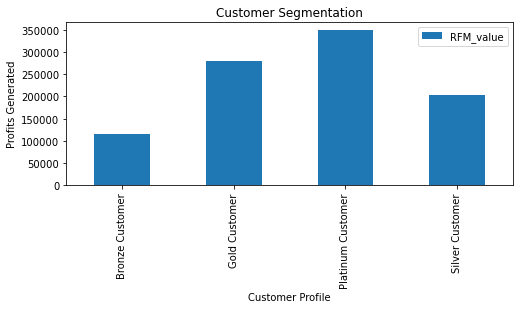

In [148]:
cust_seg.plot(kind='bar', figsize=(8,3))
plt.xlabel('Customer Profile')
plt.ylabel('Profits Generated')
plt.title('Customer Segmentation')
plt.show()

In [149]:
pivot_table.groupby(by='Customer Profile').size().sort_values()

Customer Profile
Platinum Customer    832
Gold Customer        853
Silver Customer      887
Bronze Customer      916
dtype: int64

**Inference** We can see that Platinum Customers have the highest RFM value implying they bring maximum revenue for the business. So, we should target such customers.            <br>
Also, as of now most of our customers are actually Bronze Customers so we can see there is a huge potential to change them into Platinum Customers.

### Which industry generates highest profit

In [150]:
ind_profit = pd.pivot_table(new_table, index='job_industry_category', values='Profit', aggfunc='sum')
ind_profit

,Profit
job_industry_category,
Argiculture,302991.35
Entertainment,386109.45
Financial Services,2150216.90
Health,1659918.36
IT,601378.58
Manufacturing,3935864.97
Property,700139.25
Retail,982011.36
Telecommunications,187400.01


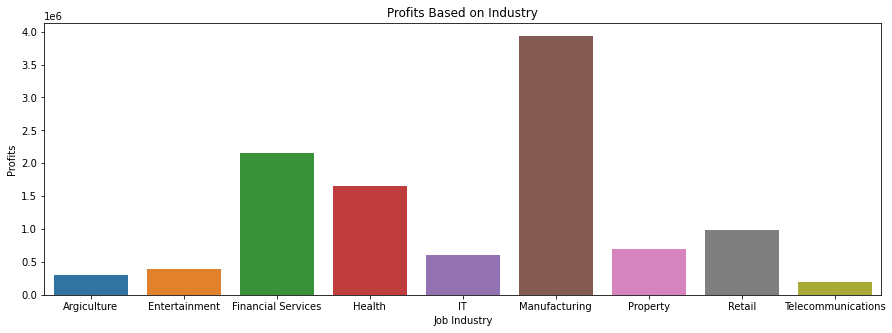

In [151]:
plt.figure(figsize=(15,5))
sns.barplot(data=ind_profit, x=ind_profit.index,y='Profit')
plt.xlabel('Job Industry')
plt.ylabel('Profits')
plt.title('Profits Based on Industry')
plt.show()

**Insights**  <br>
Very clearly Manufacturing, Financial Servies and Healthcare are the industries which drive maximum profits for us. And, industries like agriculture, entertainment make the least profits. 

#### Bike related purchases Based on Industry

In [152]:
bike_industry = pd.pivot_table(new_table, index='job_industry_category', values='past_3_years_bike_related_purchases',aggfunc='count')
bike_industry

,past_3_years_bike_related_purchases
job_industry_category,
Argiculture,578
Entertainment,698
Financial Services,3880
Health,3091
IT,1076
Manufacturing,7236
Property,1289
Retail,1758
Telecommunications,354


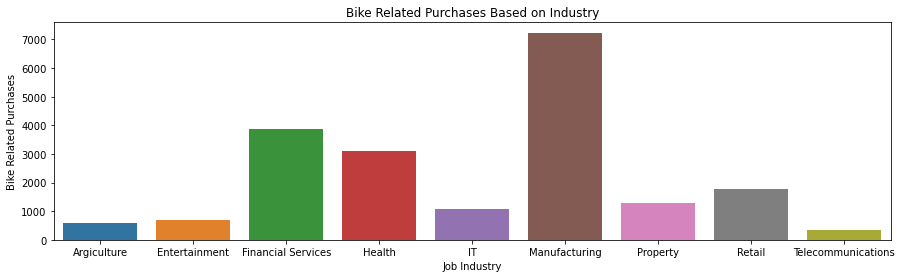

In [153]:
plt.figure(figsize=(15,4))
sns.barplot(data=bike_industry, x=bike_industry.index,y='past_3_years_bike_related_purchases')
plt.xlabel('Job Industry')
plt.ylabel('Bike Related Purchases')
plt.title('Bike Related Purchases Based on Industry')
plt.show()

From the above, have seen that our sales to turn into revenues. So, there seems to be no problem with our costs, seeling prices etc. If we sell more, we are likely to generate more profits also.

### Wealth Segments and Age

In [154]:
age_demo = pd.pivot_table(new_table, index = 'Age', values = ['Profit'])
age_demo.head()

,Profit
Age,
21,569.121017
22,579.120548
23,554.496940
24,577.270514
25,554.812430


In [155]:
bins = np.arange(18,100,10)

age_demo['age_bin'] = pd.cut(age_demo.index, bins=bins)
profit_by_age = age_demo.groupby('age_bin')['Profit'].sum()

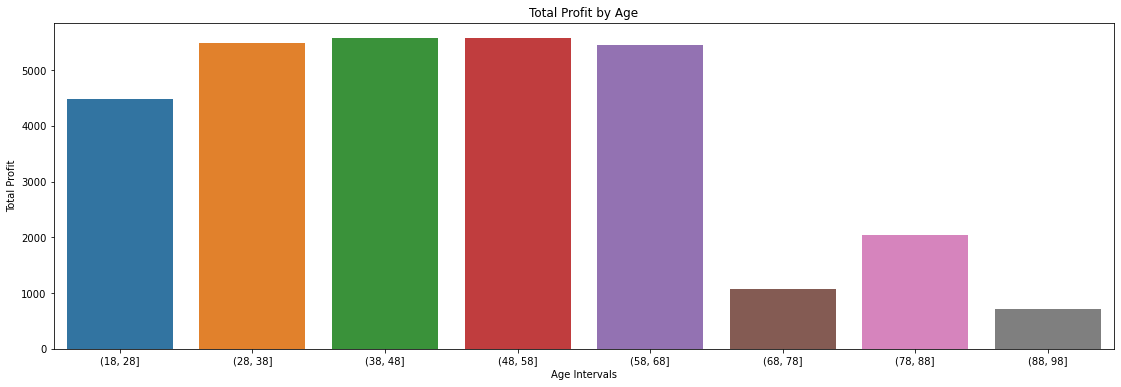

In [156]:
plt.figure(figsize=(19,6))
sns.barplot(data = age_demo, x=profit_by_age.index.astype(str), y=profit_by_age)

plt.xlabel('Age Intervals')
plt.ylabel('Total Profit')
plt.title('Total Profit by Age')
plt.show()

In [157]:
wealth_seg = new_table.groupby(by='wealth_segment').size().sort_values()
wealth_seg

wealth_segment
Affluent Customer     4850
High Net Worth        5081
Mass Customer        10029
dtype: int64

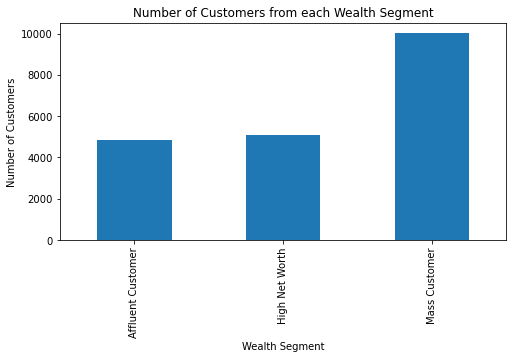

In [158]:
plt.figure(figsize=(8,4))
wealth_seg.plot(kind='bar')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers from each Wealth Segment')
plt.show()

#### helps us understand what kind of wealth segment should we be targeting, and the age demographichs to be targeted

- We can see that maximum of our customers are Mass Customers.
- Also, customers in the age range of 27-63years bring highst business. 
So, we should focus on suh customers more.

#### Car owned in diffeerent states

In [159]:
# number of cars in each state
car = pd.pivot_table(new_table, index=['state'],columns='owns_car',values=['customer_id'],aggfunc='count')
car.columns = car.columns.droplevel()
car = car.rename(columns={'no':'owns_no', 'yes':'owns_yes'})
car

owns_car,No,Yes
state,,
New South Wales,5201,5476
QLD,2129,2133
Victoria,2596,2425


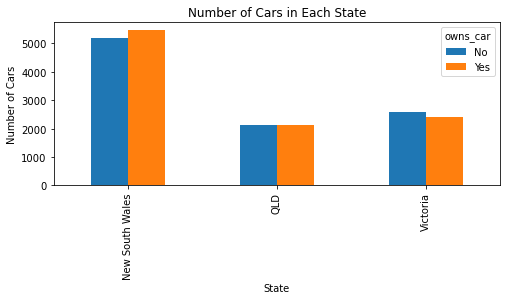

In [160]:
car.plot(kind='bar', figsize=(8,3))
plt.xlabel('State')
plt.ylabel('Number of Cars')
plt.title('Number of Cars in Each State')
plt.show()

We can see that New South Wales is has a potential market.

#### Bike related purchases based on state

In [161]:
bike_state = pd.pivot_table(new_table, index='state', values='past_3_years_bike_related_purchases',aggfunc='count')
bike_state

,past_3_years_bike_related_purchases
state,
New South Wales,10677
QLD,4262
Victoria,5021


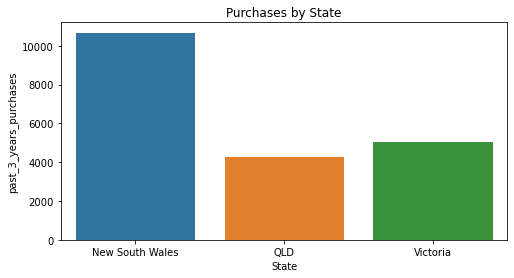

In [162]:
plt.figure(figsize=(8,4))
sns.barplot(data = bike_state, x=bike_state.index, y='past_3_years_bike_related_purchases')
plt.title('Purchases by State')
plt.xlabel('State')
plt.ylabel('past_3_years_purchases')
plt.show()

#### Bike related purchases based on gender

In [163]:
bike_gender = pd.pivot_table(new_table, index='gender', values='past_3_years_bike_related_purchases',aggfunc='count')
bike_gender

,past_3_years_bike_related_purchases
gender,
Female,9989
Male,9516
U,455


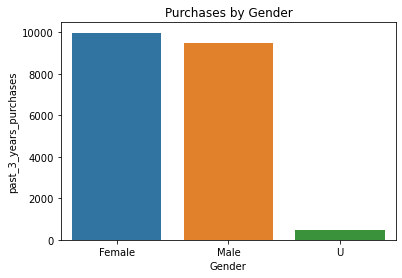

In [164]:
sns.barplot(data = bike_gender, x=bike_gender.index, y='past_3_years_bike_related_purchases')
plt.title('Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('past_3_years_purchases')
plt.show()

### Summary Observations

- Customers between the age of 28 and 68 made the most purchases. This was not exactly what we assumed in the beggining.
- Gender did not have any relation to making purchases. Our cutomers were noth Males and Females alike withought any significant difference.
- People belonging to Manufacturing, Financial Services and Healthcare make the most purchases and hence account for maximum number of our customers.

Overall we can say that for the firm to now expand it should focus on people between the age of 28-68, irrespective of the gender. Also, people belonging to Manufacturing, Financial Services and Healthcare sectors are most likely to convert to our customers.

But, at the same time we also say that New South Wales offers a wide potential for new market but we need to analyze this further before taking any action. Also, the reasons why the other industries do not make that many purchases should also be studied in order to try and turn them into our potential customers.

# Customers that the firm should Target

In [165]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.852055
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.150685
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.712329
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.290411
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.652055


In [166]:
# Convert the DOB column to datetime format
newcust['DOB'] = pd.to_datetime(newcust['DOB'])

# Calculate the age using today's date and the DOB
today = pd.Timestamp(date.today())
age1 = (today - newcust['DOB']) / pd.Timedelta(days=365)

newcust['Age'] = age1.round().astype('Int64')

# Print the resulting DataFrame
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58


In [167]:
newcust[(newcust['wealth_segment']=='Mass Customer') & (newcust['Age'] >27) & (newcust['Age'] <69) &
       (newcust['job_industry_category'].isin(['Manufacturing','Financial Services','Health']) &
        (newcust['state']=='NSW'))]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,47
8,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250,51
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,4,0591 Anzinger Circle,2232,NSW,Australia,10,14,1.593750,46
20,Teddie,Burchill,Male,11,1968-12-21,Programmer I,Manufacturing,Mass Customer,N,Yes,13,321 Raven Plaza,2161,NSW,Australia,9,21,1.515625,54
21,Gaston,Dallaghan,Male,44,1993-09-29,Financial Analyst,Financial Services,Mass Customer,N,Yes,8,656 Fuller Street,2783,NSW,Australia,7,21,1.515625,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Lezlie,Clemits,Female,2,1973-05-30,Senior Cost Accountant,Financial Services,Mass Customer,N,Yes,15,0504 Nevada Drive,2155,NSW,Australia,10,924,0.488750,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,61
960,Sonia,Dunstall,Female,0,1975-07-30,Accountant III,Financial Services,Mass Customer,N,No,10,99 Park Meadow Hill,2570,NSW,Australia,9,960,0.442000,48
964,Jammie,Seldner,Female,42,1975-02-25,Human Resources Manager,Health,Mass Customer,N,Yes,15,8 Saint Paul Junction,2066,NSW,Australia,10,963,0.440000,48


We have found out these 98 customers from 1000 new customers that the firm should target in order to derive most value for the organization

#### Saving all our updated files to excel

In [179]:
transactions.to_excel("Transactions.xlsx", index=False)
newcust.to_excel('NewCustomerList.xlsx', index=False)
custdemo.to_excel('CustomerDemographic.xlsx', index=False)
address.to_excel('CustomerAddress.xlsx', index=False)

****